## I. Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, PanTool, ResetTool, WheelZoomTool
from bokeh.models import NumeralTickFormatter

## II. Data Loading

In [2]:
df = pd.read_csv('C:/Users/MEX STORE ID/Desktop/Final Projects/historik_antam.csv')

## III. Data Cleaning

In [3]:
df.dropna(inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)

# Mengonversi kolom 'datetime' ke tipe datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# Mengatur kolom 'datetime' sebagai indeks DataFrame
df.set_index('datetime', inplace=True)

# Mengelompokkan data berdasarkan quarter dan menghitung perbedaan harga untuk setiap quarter
quarterly_price_change = df.resample('Q').agg({'price': 'first'}).diff()

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4091 entries, 2010-01-04 09:07:00 to 2023-10-08 05:06:43
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   4091 non-null   int64
 1   year    4091 non-null   int64
 2   month   4091 non-null   int64
 3   day     4091 non-null   int64
dtypes: int64(4)
memory usage: 159.8 KB


## IV. Exploratory Data Analysis (EDA)

In [10]:
# Menghitung statistik deskriptif
rata_rata = df['price'].mean()
median = df['price'].median()
deviasi_standar = df['price'].std()

# Menampilkan hasil
print("Statistik Deskriptif Harga Emas:")
print(f"Rata-rata: {rata_rata}")
print(f"Median: {median}")
print(f"Standar Deviasi: {deviasi_standar}")

Statistik Deskriptif Harga Emas:
Rata-rata: 708230.4571009533
Median: 627000.0
Standar Deviasi: 194689.31339290252


Statistik Deskriptif Harga Emas Selama 13 tahun terakhir :

Rata-rata harganya sekitar Rp708,230, dan harga tengahnya (median) adalah Rp627,000. Selain itu, Standar Deviasi sekitar Rp194,689, yang menunjukkan sejauh mana harga emas bervariasi dari rata-rata.

In [9]:
tren_tahunan = df.groupby('year')['price'].mean()
# Mengatur opsi penulisan angka dengan 2 digit di belakang koma dan menambahkan simbol Rp
pd.options.display.float_format = '{:,.2f} Rp'.format
print(tren_tahunan)

year
2010     425,235.29 Rp
2011     518,545.45 Rp
2012     576,546.09 Rp
2013     556,504.03 Rp
2014     552,642.57 Rp
2015     572,141.91 Rp
2016     604,983.71 Rp
2017     618,537.41 Rp
2018     662,288.33 Rp
2019     719,107.37 Rp
2020     934,715.13 Rp
2021     936,252.23 Rp
2022     971,695.77 Rp
2023   1,056,087.59 Rp
Name: price, dtype: float64


Dari data tren harga emas tahunan yang telah dianalisis, terlihat bahwa harga emas (dalam Rupiah) mengalami peningkatan secara konsisten dari tahun ke tahun. Pada tahun 2010, harga emas sekitar Rp425,235.29, dan selama periode 13 tahun, harga emas telah meningkat lebih dari dua kali lipat menjadi sekitar Rp1,056,087.59 pada tahun 2023. Ini menunjukkan bahwa investasi emas merupakan pilihan yang menarik karena dapat memberikan keuntungan jangka panjang yang signifikan.

Selain itu, terdapat peningkatan yang cukup tajam pada harga emas antara tahun 2019 dan 2020, di mana harga emas melonjak dari sekitar Rp719,107.37 menjadi Rp934,715.13. Hal ini mungkin disebabkan oleh faktor covid19 yang terjadi beberapa tahun yang lalu

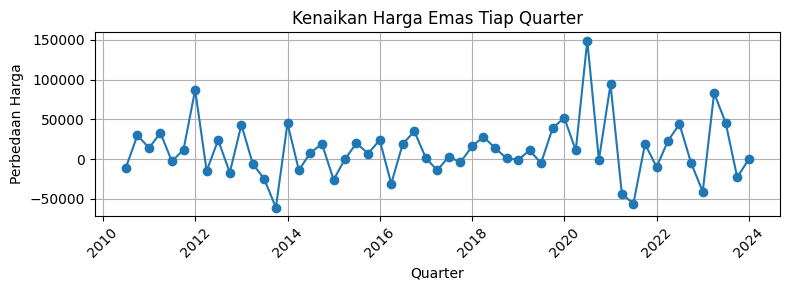

In [11]:
# Membuat plot
plt.figure(figsize=(8, 3))
plt.plot(quarterly_price_change.index, quarterly_price_change['price'], marker='o', linestyle='-')
plt.title('Kenaikan Harga Emas Tiap Quarter')
plt.xlabel('Quarter')
plt.ylabel('Perbedaan Harga')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

In [13]:
# Menghitung perubahan persentase harian dalam harga emas
df['Daily_Return'] = df['price'].pct_change()

# Menghitung deviasi standar dari perubahan persentase harian
volatility = np.std(df['Daily_Return'])

print(f'Volatilitas Harian Harga Emas: {volatility:.2%}')

Volatilitas Harian Harga Emas: 0.72%


volatilitas harian harga emas sebesar 0.72% menunjukkan bahwa harga emas cenderung mengalami fluktuasi harian sekitar 0.72% dari nilai rata-rata historisnya.

In [12]:
# Mengelompokkan data berdasarkan tahun dan menghitung harga rata-rata tahunan
yearly_avg_price = df.resample('Y').agg({'price': 'mean'})

# Menghitung perubahan harga emas
df['price_change'] = df['price'].diff()

# Membuat sumber data Bokeh
source = ColumnDataSource(df)

# Inisialisasi output_notebook
output_notebook()

# Membuat plot interaktif dengan Bokeh
p = figure(x_axis_type="datetime", title='Harga Emas (2010-2023)', sizing_mode="scale_width", width=200, height=100)  # Mengatur lebar plot
p.line('datetime', 'price', source=source, line_width=2, legend_label='Harga Emas', line_color='blue')

# Menambahkan tooltip interaktif
hover = HoverTool()
hover.tooltips = [("Tanggal", "@datetime{%F}"), ("Harga Emas", "@price{0,0}")]  # Format angka
hover.formatters = {"@datetime": "datetime"}
p.add_tools(hover)

# Menambahkan alat zoom dan geser
p.add_tools(PanTool(), ResetTool(), WheelZoomTool())

# Mengatur label sumbu x dan y
p.xaxis.axis_label = "Tanggal"
p.yaxis.axis_label = "Harga Emas"

# Mengatur format angka pada sumbu y
p.yaxis.formatter = NumeralTickFormatter(format='0a')

# Menampilkan plot
show(p)

Loading BokehJS ...